In [137]:
from models import NW   
from loaders import load_breast_cancer
import torch

%reload_ext autoreload
%autoreload 2


In [138]:
X_train, y_train, X_test, y_test = load_breast_cancer()

In [139]:
model = NW(X_train, y_train, h=1)

<AxesSubplot: >

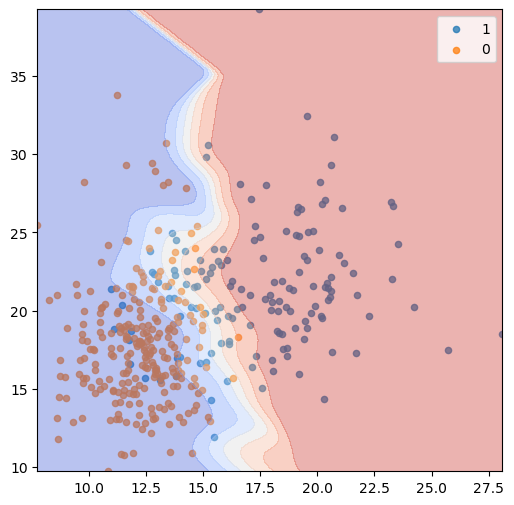

In [140]:
from helpers import plot_decision_bounary

# plot the decision boundary
plot_decision_bounary(model, X_train, y_train)
# plot_decision_bounary(model, X_test, y_test)

In [141]:
# Predict on the test set
phat = model(X_test)

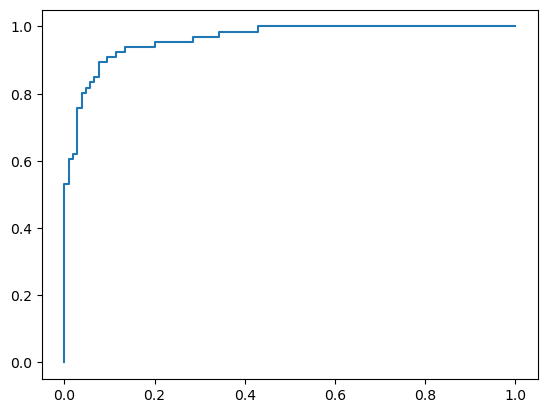

In [142]:
# Let's plot the ROC curve using the sklearn package

# compute the roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, phat)
roc_auc = auc(fpr, tpr)

# plot the roc curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

/var/folders/ch/6ry9wgx50_gg8_tlzdcdv58w0000gn/T/ipykernel_70595/987150813.py:4: RuntimeWarning: invalid value encountered in divide
  prec = tpr*pi1 / (tpr*pi1 + fpr*(1-pi1))


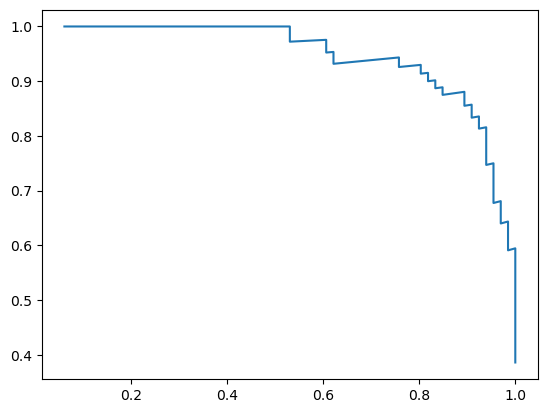

In [143]:
# Our own implementation of the precision-recall curve
pi1 = y_test.float().mean().item()

prec = tpr*pi1 / (tpr*pi1 + fpr*(1-pi1))

plt.plot(tpr, prec, label='Precision')

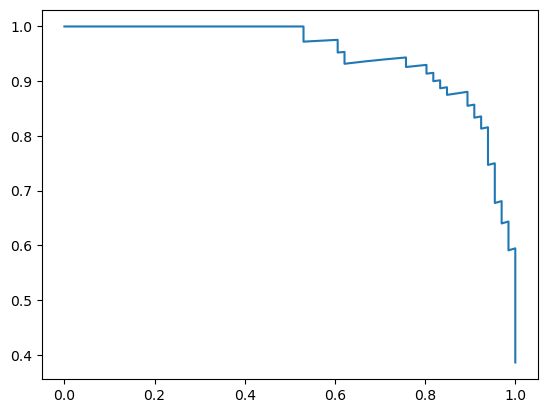

In [144]:
# Plot precision recall curve using sklearn
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, phat)
plt.plot(recall, precision, label='Precision-recall curve')

In [145]:
# # We can also compute the ROC curve ourselves (inefficiently)

# # split phat into two classes according to y_test
# phat_0 = phat[y_test == 0]
# phat_1 = phat[y_test == 1]

# # sort phat descendingly to get the thresholds
# thresholds = torch.sort(phat, descending=True)[0]

# # compute the tpr rate for each threshold
# tpr = torch.zeros_like(thresholds)
# fpr = torch.zeros_like(thresholds)
# for i, threshold in enumerate(thresholds):
#     tpr[i] = (phat_1 > threshold).float().mean()
#     fpr[i] = (phat_0 > threshold).float().mean()

# # plot the roc curve
# plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
